# 안녕하세요^^ 
## AI 프로젝트 따라하기 - 원내비 도착시간 예측 모델링 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 주변에서 마주할 수 있는 연속성을 가지는 수치를 예측할 수 있는 회귀문제를 예제코드를 통해서 기계학습(머신러닝 및 딥러닝)을 활용해서 해결할 것입니다.
* 네비게이션 주행데이터를 가지고 도착시간 정확도를 개선하는 과정을 통해 실전 AI 과제 수행에 있어 자신감을 가질 수 있는 기회가 되었으면 좋겠습니다.
* AI문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 기본전제
[기본 데이터]
* 학습데이터 : onenavi_train.csv(7월 20일에서 24일 사이의 수도권 3~15km 주행데이터)
* 평가데이터 : onenavi_evaluation.csv(7월 27일에서 31일 사이의 수도권 3~15km 주행데이터)

[추가 데이터]
* 주소(시군구)데이터 : onenavi_pnu.csv(주행데이터를 기준으로 출발지의 주소 정보, key : RID)
* 신호등(갯수)데이터 : onenavi_signal.csv(주행데이터를 기준으로 경로의 신호등 갯수, key : RID)
* 날씨데이터 : onenavi_weather.csv(주행데이터를 기준으로 해당 일자의 수도권 날씨 정보, key : RID)

[변수 설명]
* rid : 경로정보의 unique 값(id)
* departure : 출발 시간 
* arrive : 도착 시간 
* distance :  실제 거리 
* et : 실제 시간 
* eta : 기존 원내비 시간예측 모델의 시간
* etaa : 정확도

#### ※ 참고 : PEP8(https://www.python.org/dev/peps/pep-0008/)를 준수하나 교육상 필요 시 상황에 맞춰 실습할 예정입니다.

# 본격적인 실습 전 Warming Up
* AIDU에서 데이터프레임 불러오기
* 시각화 툴 사용방법

### 가. 라이브러리 Import

In [1]:
# 데이터 프레임 관련 라이브러리
import pandas as pd
import numpy as np

In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [3]:
# 시각화 관련 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("onenavi_train.csv", sep = "|")
df

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...,...,...,...
55895,router-84875df7fc-8n4sw-2-7745536-0,2020-07-24 23:57:07.000,2020-07-25 00:06:15.697,4448.0,544.301025,550.907715,98.786207
55896,router-84875df7fc-scxcj-1-6043477-0,2020-07-24 23:57:26.000,2020-07-25 00:07:15.291,3106.0,535.666992,459.554443,85.791070
55897,router-84875df7fc-b5nxc-6-13399736-0,2020-07-24 23:57:46.000,2020-07-25 00:07:56.841,10325.0,610.799988,791.658936,70.389825
55898,router-84875df7fc-cmkz9-7-56753908-0,2020-07-24 23:58:03.000,2020-07-25 00:12:42.402,4458.0,878.479004,516.855774,58.835302


### 나. Seaborn을 활용한 데이터 시각화
#### Seaborn 라이브러리는 데이터를 직관적으로 볼 수 있도록 다양한 지원을 해주고 있습니다.
#### 여기서는 Seaborn이 제공하는 통계차트 중 대표적인 몇 가지를 활용해보고자 합니다.
[참고] 공식 Document
* Seaborn(https://seaborn.pydata.org/api.html)
* Seaborn.CountChart(https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Seaborn.Distplot(https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) : 히스토그램 + 커널밀도
* Seaborn.Boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* Seaborn.Heatmap(https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
* Seaborn.Pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) : 조합별 히스토그램 + 산점도

---

# 1. 데이터 불러오기
## 모든 AI프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.
+ [참고] AIDU에서는 반드시 추가 라이브러리 Import와 설정을 해야만 데이터 불러오기가 가능하다.

### 가. 데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

### 실습1. <u>Pandas 라이브러리를 활용해서 'onenavi_train.csv'파일을 'df' 변수에 저장하고 그 Shape을 확인하세요.</u>

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(Hint : dataframe = pandas.read_csv("file"))
df = pd.read_csv('onenavi_train.csv')


In [6]:
# 데이터 프레임의 Shape을 확인합니다.(Hint : dataframe.shape)

df.shape




(55900, 1)

### 나. 학습데이터와 평가데이터 합치기
#### 학습데이터(onenavi_train.csv)는 7월 20일에서 24일까지 자료입니다.
#### 평가데이터(onenavi_evaluation.csv)는 7월 27일에서 31일까지 자료입니다.

#### 만약에 Train/Evaluation 데이터를 따로 전처리 한다면?
* 전처리 기준(특히 정규화 작업 시)이 달라져서 모델의 성능에 악영향을 줄 수 있음

### 실습2. <u>Pandas 라이브러리를 활용해서 'onenavi_train.csv'파일과 'onenavi_evaluation.csv'를 'df_total' 변수에 저장하고 그 Shape을 확인하세요.</u>

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(Hint : dataframe = pandas.concat([dataframe,dataframe]))
df2 = pd.read_csv("onenavi_evaluation.csv")

df_total = pd.concat([df, df2])




In [8]:
# 데이터 프레임의 Shape을 확인합니다.(Hint : dataframe.shape)

df_total.shape




(109642, 1)

In [9]:
df_total.head()

,RID|TIME_DEPARTUREDATE|TIME_ARRIVEDATE|A_DISTANCE|ET|ETA|ETAA
0,router-84875df7fc-b5nxc-7-20255166-0|2020-07-2...
1,router-84875df7fc-b5nxc-6-10888379-0|2020-07-2...
2,router-84875df7fc-cmkz9-7-45806143-0|2020-07-2...
3,router-84875df7fc-scxcj-7-47843617-0|2020-07-2...
4,router-84875df7fc-scxcj-3-20061505-0|2020-07-2...


# 2. 추가변수 생성
## 주어진 데이터만 가지고 모델링을 한다면 세상을 너무 만만하게 보고 있는 것입니다.
+ KeyPoint : 모델에 영향을 줄 수 있는 다양한 변수를 고민하고 기존 데이터와 Merge 할 수 있다.

#### 사실 추가변수 생성은 데이터 전처리 영역의 범위로 보는 경우도 있습니다.
#### 데이터 분석과 전처리는 '닭이 먼저냐? 달걀이 먼저냐?'와 같이 상호 인과관계를 가질 수 있습니다.
#### 다만 여기서는 교육의 원활한 진행을 위해 데이터 분석 이전에 진행하겠습니다.
#### $"주행에 영향을 미치는 요소는$" 어떤 것이 있을까요? 저는 좌표정보와 경로의 신호등 여부를 생각해봤습니다.
#### 그렇다면 어떻게 변수화 할까요?
#### 좌표정보는 $"출발지의 좌표$"를 기준으로 $"시군구 단위$"를 주소정보로 
#### 신호등 여부는 경로 상의 $"신호등 갯수$"를 변수로 만들 수 있겠네요.
#### Route ID를 기준으로 미리 데이터 프레임을 만들어 두었습니다.

### 실습3. <u>Pandas 라이브러리를 활용해서 지역정보와 신호등정보를 'df_total'와 합쳐보세요.</u>

In [10]:
df_total = df_total.rename(columns={"RID|TIME_DEPARTUREDATE|TIME_ARRIVEDATE|A_DISTANCE|ET|ETA|ETAA":"RID"})


df_total['dep_time'] = df_total['RID'].str.split('|').str[1]
df_total['arr_time'] = df_total['RID'].str.split('|').str[2]
df_total['distance'] = df_total['RID'].str.split('|').str[3]
df_total['ET'] = df_total['RID'].str.split('|').str[4]
df_total['ETA'] = df_total['RID'].str.split('|').str[5]
df_total['ETAA'] = df_total['RID'].str.split('|').str[6]
df_total['RID'] = df_total['RID'].str.split('|').str[0]

df_total

,RID,dep_time,arr_time,distance,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.5340576171875,987.6246337890624,82.19697373769516
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.8170166015625,855.9337158203125,96.10147659352327
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.7109985351561,575.9545288085938,90.65074957417076
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.5819702148438,537.1170043945311,59.77384614851674
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.7589721679688,786.3525390625,82.10338528936192
...,...,...,...,...,...,...,...
53737,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.8739929199219,633.0936889648438,39.26491711943078
53738,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.9450073242188,377.0835571289063,78.73211983889456
53739,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.48199462890625,412.30841064453125,15.507100995239966
53740,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.3290100097656,580.275146484375,38.95963678621147


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.(Hint : dataframe = pandas.merge(dataframe,dataframe, on='key'))
df_pnu = pd.read_csv("onenavi_pnu.csv")
df_pnu

,RID|level1_pnu|level2_pnu
0,router-84875df7fc-b5nxc-2-2300503-0|경기도|고양시 덕양구
1,router-84875df7fc-scxcj-6-3976613-0|서울특별시|금천구
2,router-84875df7fc-52vz8-4-7281375-0|경기도|화성시
3,router-84875df7fc-scxcj-3-7147622-0|경기도|하남시
4,router-84875df7fc-cmkz9-4-7525466-0|서울특별시|서초구
...,...
442371,router-84875df7fc-b5nxc-4-115039601-0|서울특별시|은평구
442372,router-84875df7fc-52vz8-0-14556292-0|서울특별시|서초구
442373,router-84875df7fc-b5nxc-4-115045893-0|서울특별시|구로구
442374,router-84875df7fc-b5nxc-4-115090914-0|서울특별시|영등포구


In [12]:
df_pnu = df_pnu.rename(columns={"RID|level1_pnu|level2_pnu":"RID"})


df_pnu['lev1_pnu'] = df_pnu['RID'].str.split("|").str[1]
df_pnu['lev2_pnu'] = df_pnu['RID'].str.split("|").str[2]
df_pnu['RID'] = df_pnu['RID'].str.split("|").str[0]

df_pnu #total보다 많음 

,RID,lev1_pnu,lev2_pnu
0,router-84875df7fc-b5nxc-2-2300503-0,경기도,고양시 덕양구
1,router-84875df7fc-scxcj-6-3976613-0,서울특별시,금천구
2,router-84875df7fc-52vz8-4-7281375-0,경기도,화성시
3,router-84875df7fc-scxcj-3-7147622-0,경기도,하남시
4,router-84875df7fc-cmkz9-4-7525466-0,서울특별시,서초구
...,...,...,...
442371,router-84875df7fc-b5nxc-4-115039601-0,서울특별시,은평구
442372,router-84875df7fc-52vz8-0-14556292-0,서울특별시,서초구
442373,router-84875df7fc-b5nxc-4-115045893-0,서울특별시,구로구
442374,router-84875df7fc-b5nxc-4-115090914-0,서울특별시,영등포구


In [13]:
df_total.columns

Index(['RID', 'dep_time', 'arr_time', 'distance', 'ET', 'ETA', 'ETAA'], dtype='object')

In [14]:
df_inner = pd.merge(df_total, df_pnu)
df_inner

,RID,dep_time,arr_time,distance,ET,ETA,ETAA,lev1_pnu,lev2_pnu
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.5340576171875,987.6246337890624,82.19697373769516,경기도,광명시
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.8170166015625,855.9337158203125,96.10147659352327,서울특별시,영등포구
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.7109985351561,575.9545288085938,90.65074957417076,경기도,김포시
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.5819702148438,537.1170043945311,59.77384614851674,경기도,광주시
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.7589721679688,786.3525390625,82.10338528936192,경기도,안산시 상록구
...,...,...,...,...,...,...,...,...,...
109637,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.8739929199219,633.0936889648438,39.26491711943078,경기도,용인시 처인구
109638,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.9450073242188,377.0835571289063,78.73211983889456,서울특별시,광진구
109639,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.48199462890625,412.30841064453125,15.507100995239966,경기도,연천군
109640,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.3290100097656,580.275146484375,38.95963678621147,경기도,성남시 분당구


In [15]:
df_inner.shape

(109642, 9)

### 실습4. <u>날씨 데이터를 추가변수로 만들어봅시다.</u>

In [16]:
# 아래에 실습코드를 작성하고 날씨 데이터를 추가변수로 만들어봅시다.(Hint : onenavi_weather.csv)
# 다만 이후 실습에서는 날씨 데이터를 사용하지 않을 예정이니 추가한 데이터 프레임은 df_total_temp로 저장해주세요.


df_wth = pd.read_csv("onenavi_weather.csv")
df_wth



,RID|temp|precipitation
0,router-84875df7fc-b5nxc-7-20255166-0|23.8|3.6
1,router-84875df7fc-b5nxc-6-10888379-0|23.8|3.6
2,router-84875df7fc-cmkz9-7-45806143-0|23.8|3.6
3,router-84875df7fc-scxcj-7-47843617-0|23.8|3.6
4,router-84875df7fc-scxcj-3-20061505-0|23.8|3.6
...,...
123087,router-84875df7fc-b5nxc-0-6856031-0|26.2|1.5
123088,router-84875df7fc-cmkz9-7-71080475-0|26.2|1.5
123089,router-84875df7fc-cmkz9-7-71082304-0|26.2|1.5
123090,router-84875df7fc-b5nxc-4-75603454-0|26.2|1.5


In [17]:
df_wth = df_wth.rename(columns={"RID|temp|precipitation":"RID"})

df_wth['temp'] = df_wth['RID'].str.split('|').str[1]
df_wth['prec'] = df_wth['RID'].str.split('|').str[2]
df_wth['RID'] = df_wth['RID'].str.split('|').str[0]

df_wth

,RID,temp,prec
0,router-84875df7fc-b5nxc-7-20255166-0,23.8,3.6
1,router-84875df7fc-b5nxc-6-10888379-0,23.8,3.6
2,router-84875df7fc-cmkz9-7-45806143-0,23.8,3.6
3,router-84875df7fc-scxcj-7-47843617-0,23.8,3.6
4,router-84875df7fc-scxcj-3-20061505-0,23.8,3.6
...,...,...,...
123087,router-84875df7fc-b5nxc-0-6856031-0,26.2,1.5
123088,router-84875df7fc-cmkz9-7-71080475-0,26.2,1.5
123089,router-84875df7fc-cmkz9-7-71082304-0,26.2,1.5
123090,router-84875df7fc-b5nxc-4-75603454-0,26.2,1.5


In [18]:
df_total_temp = pd.merge(df_inner, df_wth)
df_total_temp

,RID,dep_time,arr_time,distance,ET,ETA,ETAA,lev1_pnu,lev2_pnu,temp,prec
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.5340576171875,987.6246337890624,82.19697373769516,경기도,광명시,23.8,3.6
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.8170166015625,855.9337158203125,96.10147659352327,서울특별시,영등포구,23.8,3.6
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.7109985351561,575.9545288085938,90.65074957417076,경기도,김포시,23.8,3.6
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.5819702148438,537.1170043945311,59.77384614851674,경기도,광주시,23.8,3.6
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.7589721679688,786.3525390625,82.10338528936192,경기도,안산시 상록구,23.8,3.6
...,...,...,...,...,...,...,...,...,...,...,...
109577,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.8739929199219,633.0936889648438,39.26491711943078,경기도,용인시 처인구,26.2,1.5
109578,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.9450073242188,377.0835571289063,78.73211983889456,서울특별시,광진구,26.2,1.5
109579,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.48199462890625,412.30841064453125,15.507100995239966,경기도,연천군,26.2,1.5
109580,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.3290100097656,580.275146484375,38.95963678621147,경기도,성남시 분당구,26.2,1.5


# 3. 데이터 분석하기
## 최적의 모델을 만들기위해 $"데이터를 입체적으로 바라보는$" 시도는 중요합니다.
+ KeyPoint : 데이터의 형태를 살펴보고 / 다양한 분석기법을 통해 / 모델링에 적합하도록 / 정제요소를 선별할 수 있다.
  1. 관측치들의 패턴 탐색
      - 1-1. 정확도의 분포는 어떠한가
      
  2. 잘못된 자료들을 탐색
      - 2-1. 비어있는 값이 있는가 
      - 2-2. 형식에 맞지 않는 값이 있는가
  
  3. 변수들간의 관계 파악
      - 3-1. 지역마다 정확도에 차이가 있는가

In [19]:
df_inner.head()

,RID,dep_time,arr_time,distance,ET,ETA,ETAA,lev1_pnu,lev2_pnu
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.5340576171875,987.6246337890624,82.19697373769516,경기도,광명시
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.8170166015625,855.9337158203125,96.10147659352327,서울특별시,영등포구
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.7109985351561,575.9545288085938,90.65074957417076,경기도,김포시
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.5819702148438,537.1170043945311,59.77384614851674,경기도,광주시
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.7589721679688,786.3525390625,82.10338528936192,경기도,안산시 상록구


In [20]:
df_total_inner = df_inner.copy()


In [21]:
df_total_inner.head()

,RID,dep_time,arr_time,distance,ET,ETA,ETAA,lev1_pnu,lev2_pnu
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.5340576171875,987.6246337890624,82.19697373769516,경기도,광명시
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.8170166015625,855.9337158203125,96.10147659352327,서울특별시,영등포구
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.7109985351561,575.9545288085938,90.65074957417076,경기도,김포시
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.5819702148438,537.1170043945311,59.77384614851674,경기도,광주시
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.7589721679688,786.3525390625,82.10338528936192,경기도,안산시 상록구


matplotlib을 사용하여 그래프를 그릴 때 한글은 깨진다. 
사용 가능한 폰트를 찾아서 설정해주는 작업이 필요하다. 

In [27]:
import matplotlib.font_manager as fm

# 23년부터 없어진것으로 예상된다. 
# fm.get_fontconfig_fonts()
# 다른 방법
sys_fonts = fm.findSystemFonts()

print(sys_fonts)

['/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf']


In [37]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf"
font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name #폰트 설정!한번만 해주면 됨

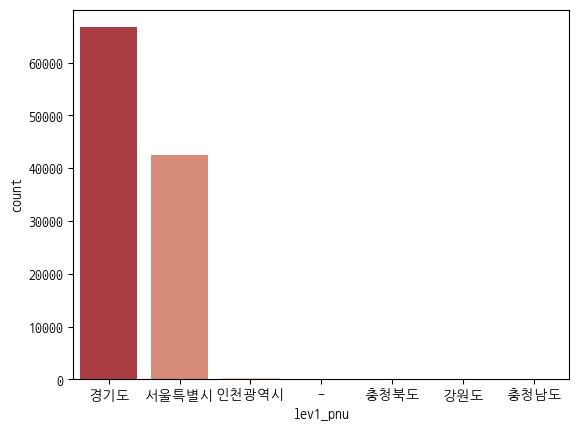

In [32]:

ax = sns.countplot(x=df_total_inner['lev1_pnu'], palette = "RdBu")

In [ ]:
# 아래에 실습코드를 작성하고 차트를 구성해봅니다.

## 1-1.
ax = sns.histplot(data=df_total_inner, x="ETAA")

In [ ]:
# 아래에 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.


sns 너무 느림.  tocsv도 느림. 차라리 소스코드 다운로드 되면 좋을텐데. 

### 다. 상관관계 분석(Pandas/Seaborn)
#### 상관관계 분석은 왜 하는것일까요?
##### 막연하게 상관관계는 높으면 좋을 것 같습니다. 하지만 AI모델링을 할때 꼭 좋은 것은 아닙니다. 가령 살아온 날수와 식사를 한 끼니 수는 강한 상관관계를 가질 것입니다. 그러나 조금만 다르게 보면 둘은 같은 이야기를 하는 것이라고 할 수 있습니다.($다중공선성$의 문제)
##### $상관관계 계수만으로 어떤 결정을 한다는 것은 섣부른 일$입니다. 어떤 변수인지 확인이 반드시 필요하며, 시각화를 통해 분포도 확인하고 결정을 해야합니다.
[다중공선성 해결 Tip]
* 상관관계가 높은 독립변수중 하나 혹은 일부를 제거
* 변수를 변형시키거나 새로운 관측치를 이용
* 기타 다른 분석을 이용

### 실습6. <u>변수 df_total를 토대로 상관계수를 구하고 시각화 후 나름의 분석을 해보세요.</u>

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
# Hint!
## 상관계수 계산 : dataframe.corr()
## 시각화 : seaborn.heatmap(dataframe.corr(), annot=True)

df_cor = df_total_inner.corr()
df_cor


In [ ]:
sns.heatmap(df_cor, annot=True, cmap='RdBu')

In [ ]:
# 아래에 차트를 통해 알게된 사실을 정리해봅시다.
# 




